In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')


In [3]:
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])


data.insert(3,"CompanyName",CompanyName)


data.drop(['CarName'],axis=1,inplace=True)


data.drop(['car_ID'],axis=1,inplace=True)

data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data = data.drop(['carheight'   , 'carlength' ,'carwidth'  ,'wheelbase'], axis=1)
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,2823,ohcv,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,2337,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,2824,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
def binary_dummy_replace(X) :
     return X.map({"gas":1,"diesel":0,
                   "std":1,"turbo":0,
                   "two":1, "four":0,
                   "front": 1, "rear": 0})


In [6]:
def update_cn(x):
    if x == 'four':
        return 4
    elif x == 'six':
        return 6
    elif x == 'five':
        return 5
    elif x == 'three':
        return 3
    elif x == 'twelve':
        return 12
    elif x == 'two':
        return 2
    else:
        return 8

In [7]:
data['cylindernumber'] = data['cylindernumber'].apply(update_cn)

In [8]:
def dummies(x,df):  
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    
    #l = temp.columns.values
    #for nm in l:
        #newt=x+"_"+nm
        #temp.rename({nm: Replace_Name(x)+"_"+nm}, axis=1, inplace=True)
        
    #print(temp.columns.values)
        
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [9]:
data = dummies('CompanyName',data)
data = dummies('carbody',data)
data = dummies('drivewheel',data)
data = dummies('enginetype',data)
data = dummies('fuelsystem',data)
data = dummies('fueltype',data)
data = dummies('aspiration',data)
data = dummies('doornumber',data)
data = dummies('enginelocation',data)

In [10]:
data['cylindernumber'] = data['cylindernumber'].apply(update_cn)


In [11]:
data.head()

,symboling,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear
0,3,2548,8,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,1,0,0,1,0,1,0
1,3,2548,8,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,1,0,0,1,0,1,0
2,1,2823,8,152,2.68,3.47,9.0,154,5000,19,...,0,0,0,1,0,0,1,0,1,0
3,2,2337,8,109,3.19,3.40,10.0,102,5500,24,...,0,0,0,1,0,0,1,0,0,0
4,2,2824,8,136,3.19,3.40,8.0,115,5500,18,...,0,0,0,1,0,0,1,0,0,0


In [12]:
data['boreratio'] = data['boreratio']/data['boreratio'].mean()

In [13]:
data['stroke'] = data['stroke']/data['stroke'].mean()

In [14]:
data['peakrpm'] = data['peakrpm']/data['peakrpm'].mean()

In [15]:
data['citympg'] = data['citympg']/data['citympg'].mean()

In [16]:
data['highwaympg'] = data['highwaympg']/data['highwaympg'].mean()

In [17]:
data['price'] = data['price']/data['price'].mean()

In [18]:
data['horsepower'] = data['horsepower']/data['horsepower'].mean()

In [19]:
data['enginesize'] = data['enginesize']/data['enginesize'].mean()

In [20]:
data['curbweight'] = data['curbweight']/data['curbweight'].mean()

In [21]:
data['compressionratio'] = data['compressionratio']/data['compressionratio'].mean()

In [22]:
Y = np.array(data['price']).reshape(-1,1)


In [23]:
data.drop(['price'],axis=1,inplace=True)


In [24]:
X = np.array(data)

In [25]:
X = np.concatenate(((np.ones((len(Y),1))),X),axis=1)

In [26]:
X.shape

(205, 62)

In [27]:
Y.shape

(205, 1)

In [28]:
theta = np.zeros((62,1))

In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size = 0.33,random_state=0)


In [30]:
def compute_cost(x,y,theta):
    h_x = x.dot(theta)
    J = (1/2*len(y))*sum((np.square(h_x - y)))
    return J

In [31]:
def gradient_descent(x,y,theta,alpha,iteration):
    J_hist = []
    print('descent started')
    for i in range(iteration):
        h_x = x.dot(theta)
        J_hist.append(compute_cost(x,y,theta))
        theta = theta -(alpha/len(y))*(np.dot(x.T,h_x-y))
    print('descent finished.')
    return theta, J_hist

In [32]:
final_theta, cost_history = gradient_descent(Xtrain,Ytrain,theta,0.01,20000)

descent started
descent finished.


In [33]:
final_theta

array([[ 0.00074085],
       [ 0.01072506],
       [ 0.45161354],
       [ 0.00592677],
       [ 0.59732594],
       [-0.14633382],
       [-0.04185906],
       [ 0.02792714],
       [ 0.25985161],
       [ 0.0763054 ],
       [-0.0849969 ],
       [-0.0655108 ],
       [-0.06490081],
       [ 0.11059232],
       [ 0.46572481],
       [ 0.59545071],
       [-0.06414867],
       [-0.18891245],
       [-0.03715983],
       [-0.26708861],
       [ 0.29441345],
       [-0.12869812],
       [-0.05652831],
       [ 0.        ],
       [-0.19237911],
       [-0.13209084],
       [-0.06791012],
       [-0.17828384],
       [ 0.16611707],
       [ 0.3210164 ],
       [ 0.        ],
       [-0.05450506],
       [-0.32894021],
       [-0.14477638],
       [ 0.        ],
       [-0.02185364],
       [-0.07068541],
       [ 0.0783174 ],
       [-0.0320299 ],
       [-0.23234845],
       [-0.13600204],
       [-0.14057341],
       [-0.22714621],
       [ 0.02786654],
       [ 0.07491247],
       [ 0

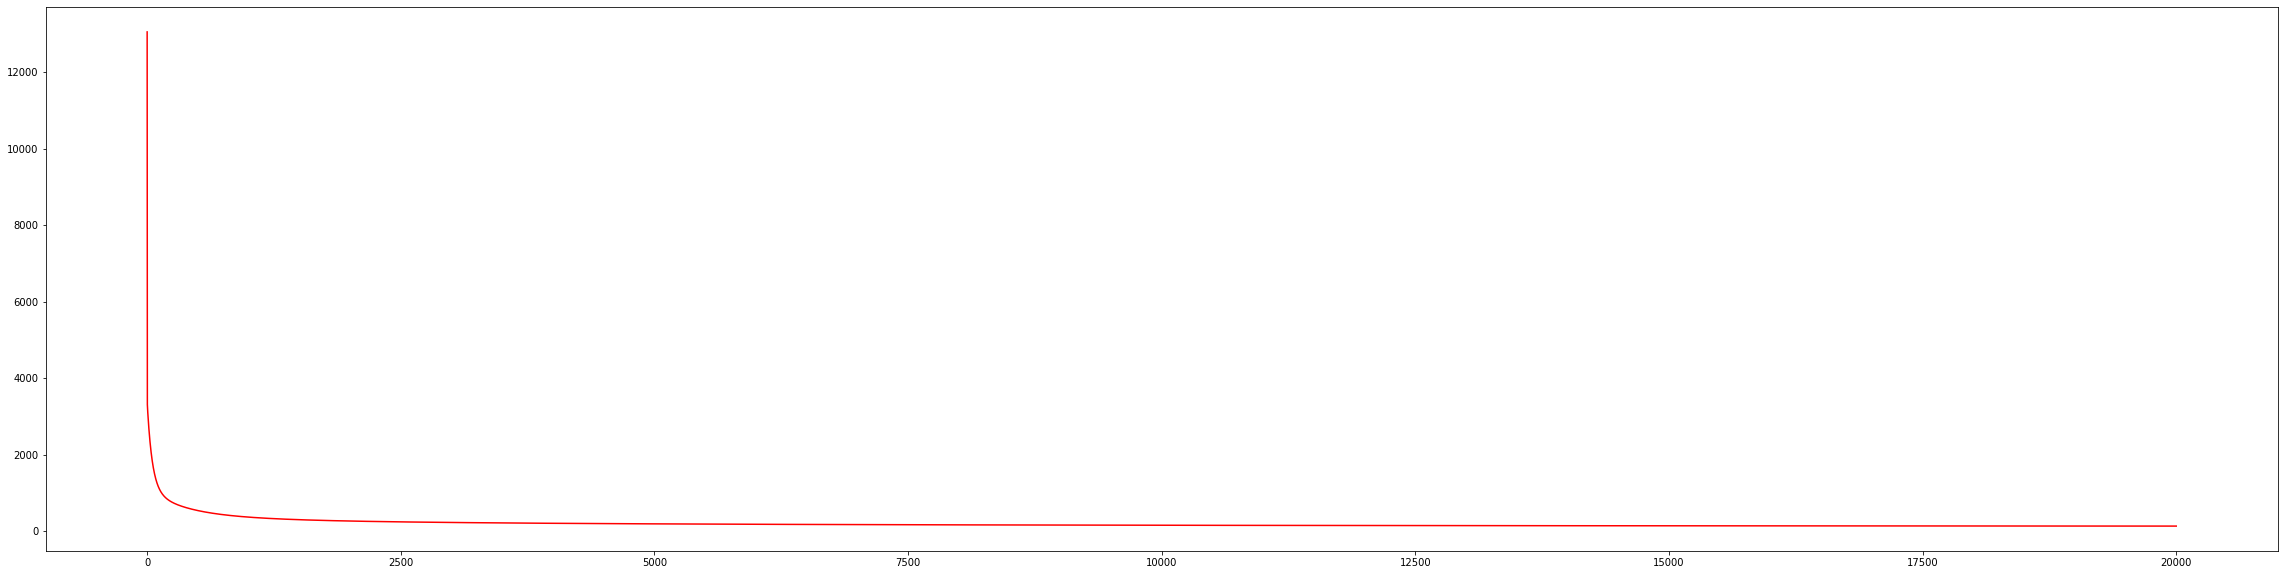

In [34]:
plt.figure(figsize=(40,10))
plt.plot(list(range(1,20001)),cost_history,color='red')

In [35]:
Y_predict = Xtest.dot(final_theta)

In [36]:
Y_predict  ####Our final pediction

array([[0.51642852],
       [1.41033178],
       [1.1517071 ],
       [0.13203738],
       [0.82393139],
       [0.88814168],
       [0.38184797],
       [0.45666048],
       [1.30179285],
       [0.53306128],
       [1.69461362],
       [2.31481687],
       [1.01247301],
       [0.94835683],
       [0.34193924],
       [0.96186823],
       [0.90360798],
       [1.20989974],
       [0.68030402],
       [0.51153568],
       [0.6684574 ],
       [1.01454409],
       [0.91867513],
       [0.9906732 ],
       [1.35906724],
       [0.47771844],
       [0.55545747],
       [0.96508198],
       [0.58040587],
       [0.59543008],
       [0.67980932],
       [0.73518321],
       [1.59458723],
       [0.71910211],
       [0.54849614],
       [2.20486801],
       [0.91330239],
       [1.21939278],
       [0.3843666 ],
       [2.66973733],
       [0.26998145],
       [1.27722119],
       [2.43082914],
       [0.99766414],
       [0.84366238],
       [0.56024194],
       [0.47626206],
       [1.048

In [37]:
Ytest 

array([[0.51179846],
       [1.18628782],
       [1.14862789],
       [0.38797261],
       [0.75282201],
       [0.84350713],
       [0.40589873],
       [0.59487627],
       [1.2954263 ],
       [0.49176338],
       [1.57945749],
       [2.36508131],
       [0.82437588],
       [1.38166754],
       [0.67158954],
       [0.7523701 ],
       [0.70009811],
       [1.42505178],
       [0.59465031],
       [0.48867526],
       [0.7501105 ],
       [1.17348344],
       [0.74529003],
       [0.86986908],
       [1.20496714],
       [0.38548705],
       [0.5225692 ],
       [1.25746509],
       [0.6295234 ],
       [0.41418392],
       [0.60067589],
       [0.9256811 ],
       [1.65839271],
       [0.67396212],
       [0.51586573],
       [3.11184007],
       [0.87333379],
       [1.36705548],
       [0.48031476],
       [3.41952171],
       [0.67158954],
       [1.31433158],
       [2.57473414],
       [1.13281072],
       [0.84802632],
       [0.57310883],
       [0.57310883],
       [1.119

In [38]:
 from sklearn.metrics import r2_score

In [39]:
r2_score(Y_predict,Ytest)

0.8311540510818545